In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/CV_tests/

/content/drive/My Drive/CV_tests


In [ ]:
%ls

Assignment_2_Sol.ipynb   movie-wall-e-ad1.jpg
beach.jpg                output.png
cat.jpg                  peppers.pgm
catnew.bmp               peppers.png
chessboard.jpg           Railroad-Tracks-Perspective.jpg
circles.jpg              Report.gdoc
Class_Jan_31_2022.ipynb  rotated_image.png
CV_ImageFormation.ipynb  small_cat.jpg
dog.bmp                  test11.jpg
lenna.pgm                test1.jpg
lenna.png


In [ ]:
from PIL import Image
import numpy as np
import math
from scipy import signal

# **Part** **1.1** 

In [ ]:
def boxfilter(n):

	assert(n%2 != 0), "Dimension must be odd"
	filter = []
	for i in range(0,n):
		row = []
		for j in range(0,n):		
			row.append(1/int(n*n))	# Dvide every value by n^2
		filter.append(row)

	
	return np.asarray(filter)

# **Answers**
 

In [ ]:
boxfilter(3)



array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [ ]:
boxfilter(4)

AssertionError: ignored

In [ ]:
boxfilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

# **Part** **1.2** 

In [ ]:
def gauss1d(sigma):
  length=int(math.ceil(sigma*6)) #roundoff we use math.ceil not math.floor. Math.ceil returns the smallest Double data type that is greater than or equal to the argument
  if (length%2 == 0): 
    length = length + 1 #it will covert even number into odd by adding 1
  cen = length/2

  x = np.arange(-cen, cen +1)
  result = np.exp(-(x**2)/(2*sigma**2))
  result = result/np.sum(result)

  return(result) 


# **Answers** 

In [ ]:
  gauss1d(0.3)

array([7.47255758e-06, 4.99992527e-01, 4.99992527e-01, 7.47255758e-06])

In [ ]:
gauss1d(0.5)

array([0.0089931, 0.4910069, 0.4910069, 0.0089931])

In [ ]:
gauss1d(1)

array([0.00087271, 0.01752886, 0.12952176, 0.35207666, 0.35207666,
       0.12952176, 0.01752886, 0.00087271])

In [ ]:
gauss1d(2)

array([0.00101494, 0.00454863, 0.01587627, 0.04315617, 0.09136162,
       0.15062984, 0.19341254, 0.19341254, 0.15062984, 0.09136162,
       0.04315617, 0.01587627, 0.00454863, 0.00101494])

# **Part** **1.3** 

In [ ]:
def gauss2d(sigma):
  gauss2d_1= gauss1d(sigma)[np.newaxis] #1D array will become 2D array
  gauss2d_2= gauss2d_1. T #Taking Transpose
  gauss2d_final= signal.convolve2d(gauss2d_1,gauss2d_2)
  return(gauss2d_final)

# **Answers** 

In [ ]:
gauss2d(0.3)

array([[5.58391168e-11, 3.73622295e-06, 3.73622295e-06, 5.58391168e-11],
       [3.73622295e-06, 2.49992527e-01, 2.49992527e-01, 3.73622295e-06],
       [3.73622295e-06, 2.49992527e-01, 2.49992527e-01, 3.73622295e-06],
       [5.58391168e-11, 3.73622295e-06, 3.73622295e-06, 5.58391168e-11]])

In [ ]:
gauss2d(0.5)

array([[8.08759372e-05, 4.41567655e-03, 4.41567655e-03, 8.08759372e-05],
       [4.41567655e-03, 2.41087771e-01, 2.41087771e-01, 4.41567655e-03],
       [4.41567655e-03, 2.41087771e-01, 2.41087771e-01, 4.41567655e-03],
       [8.08759372e-05, 4.41567655e-03, 4.41567655e-03, 8.08759372e-05]])

In [ ]:
gauss2d(1)

array([[7.61624117e-07, 1.52976293e-05, 1.13035041e-04, 3.07261099e-04,
        3.07261099e-04, 1.13035041e-04, 1.52976293e-05, 7.61624117e-07],
       [1.52976293e-05, 3.07261099e-04, 2.27036949e-03, 6.17150414e-03,
        6.17150414e-03, 2.27036949e-03, 3.07261099e-04, 1.52976293e-05],
       [1.13035041e-04, 2.27036949e-03, 1.67758876e-02, 4.56015903e-02,
        4.56015903e-02, 1.67758876e-02, 2.27036949e-03, 1.13035041e-04],
       [3.07261099e-04, 6.17150414e-03, 4.56015903e-02, 1.23957974e-01,
        1.23957974e-01, 4.56015903e-02, 6.17150414e-03, 3.07261099e-04],
       [3.07261099e-04, 6.17150414e-03, 4.56015903e-02, 1.23957974e-01,
        1.23957974e-01, 4.56015903e-02, 6.17150414e-03, 3.07261099e-04],
       [1.13035041e-04, 2.27036949e-03, 1.67758876e-02, 4.56015903e-02,
        4.56015903e-02, 1.67758876e-02, 2.27036949e-03, 1.13035041e-04],
       [1.52976293e-05, 3.07261099e-04, 2.27036949e-03, 6.17150414e-03,
        6.17150414e-03, 2.27036949e-03, 3.07261099e-04, 1.

In [ ]:
gauss2d(2)

array([[1.03009483e-06, 4.61656473e-06, 1.61133942e-05, 4.38007466e-05,
        9.27261814e-05, 1.52879628e-04, 1.96301328e-04, 1.96301328e-04,
        1.52879628e-04, 9.27261814e-05, 4.38007466e-05, 1.61133942e-05,
        4.61656473e-06, 1.03009483e-06],
       [4.61656473e-06, 2.06900077e-05, 7.22152227e-05, 1.96301328e-04,
        4.15569914e-04, 6.85158956e-04, 8.79761514e-04, 8.79761514e-04,
        6.85158956e-04, 4.15569914e-04, 1.96301328e-04, 7.22152227e-05,
        2.06900077e-05, 4.61656473e-06],
       [1.61133942e-05, 7.22152227e-05, 2.52055894e-04, 6.85158956e-04,
        1.45048152e-03, 2.39143974e-03, 3.07066940e-03, 3.07066940e-03,
        2.39143974e-03, 1.45048152e-03, 6.85158956e-04, 2.52055894e-04,
        7.22152227e-05, 1.61133942e-05],
       [4.38007466e-05, 1.96301328e-04, 6.85158956e-04, 1.86245514e-03,
        3.94281756e-03, 6.50060718e-03, 8.34694484e-03, 8.34694484e-03,
        6.50060718e-03, 3.94281756e-03, 1.86245514e-03, 6.85158956e-04,
        1.963

# **Part** **1.4 (a)** 

In [ ]:
def gaussconvolve2d(array,sigma):
  filter=gauss2d(sigma)
  gaussfilter= signal.convolve2d(array,filter,'same')
  return(gaussfilter)



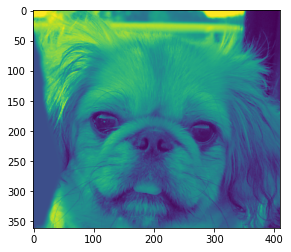

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = Image.open('/content/drive/My Drive/CV_tests/dog.bmp').convert('L') #Convert into Grayscale 
plt.imshow(img)


Ref : https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python


In [ ]:
x=image = np.array(img)

In [ ]:
gaussconvolve2d(x,3)

array([[ 63.71175361,  80.44647329,  95.42534035, ...,  11.80038331,
         10.73565694,   9.26819866],
       [ 80.40146705, 101.52857462, 120.44234396, ...,  14.89358218,
         13.55088967,  11.69886513],
       [ 95.29142015, 120.34655983, 142.78283306, ...,  17.65675771,
         16.06702593,  13.87197016],
       ...,
       [ 30.04055229,  38.84756692,  47.2920831 , ...,  36.09207939,
         32.15005816,  27.16391478],
       [ 26.40011789,  34.25880539,  41.85891047, ...,  31.08485371,
         27.69007288,  23.39707992],
       [ 22.07156421,  28.72603658,  35.2065249 , ...,  25.5358912 ,
         22.72650356,  19.18554948]])

# **Part** **1.4(b)** 

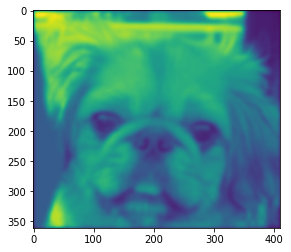

In [ ]:
plt.imshow(gaussconvolve2d(x,3))

In [ ]:
t=gaussconvolve2d(x,3)
t.shape

(361, 410)

In [ ]:
def gausscorrelate2d(array,sigma):#create fuction of correlate
  filter=gauss2d(sigma)
  gausscorfilter= signal.correlate2d(array,filter,'same')
  return(gausscorfilter)


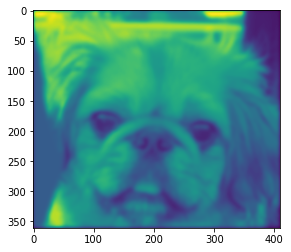

In [ ]:
plt.imshow(gausscorrelate2d(x,3))
p=gausscorrelate2d(x,3)

Text(0.5, 1.0, 'fig2.gausscorrelate at sigma=3')

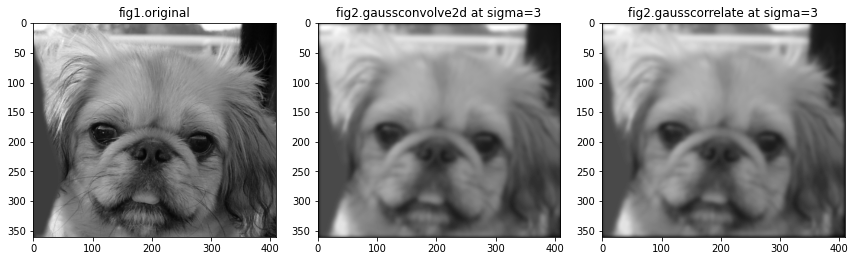

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (12, 12))
axes = axes.ravel()
fig.tight_layout()
axes[0].imshow(x,cmap = plt.cm.gray)
axes[0].set_title("fig1.original")
axes[1].imshow(t, cmap = plt.cm.gray)
axes[1].set_title("fig2.gaussconvolve2d at sigma=3")
axes[2].imshow(p, cmap = plt.cm.gray)
axes[2].set_title("fig2.gausscorrelate at sigma=3")


# **Part** **2.1** 

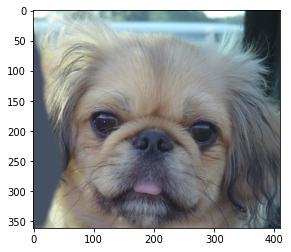

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = Image.open('/content/drive/My Drive/CV_tests/dog.bmp').convert('RGB')
plt.imshow(img)



In [ ]:
red, green, blue = img.split()

In [ ]:
filter_red = np.asarray(gaussconvolve2d(red,11))
filter_green = np.asarray(gaussconvolve2d(green,11))
filter_blue = np.asarray(gaussconvolve2d(blue,11))

In [ ]:
filter_img = np.dstack((filter_red,filter_green,filter_blue))

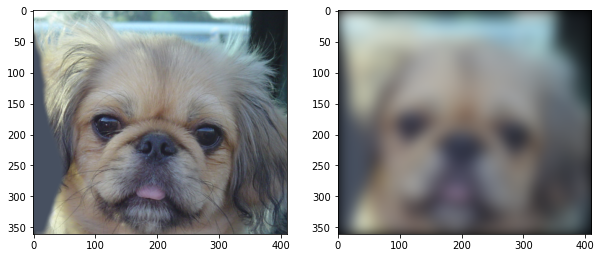

In [ ]:
filter_img = np.asarray(filter_img).astype('int')
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.imshow(img)
ax2.imshow(filter_img)

## **Part** **2.2**

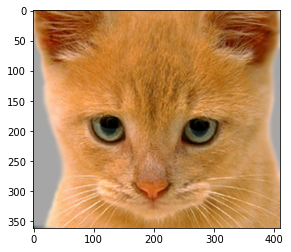

In [ ]:
img_cat = Image.open('/content/drive/My Drive/CV_tests/catnew.bmp').convert('RGB')
plt.imshow(img_cat)


In [ ]:
red_cat, green_cat, blue_cat = img_cat.split()
filterc_red = np.asarray(gaussconvolve2d(red_cat,10))
filterc_green = np.asarray(gaussconvolve2d(green_cat,10))
filterc_blue = np.asarray(gaussconvolve2d(blue_cat,10))
filter_cat_img = np.dstack((filterc_red,filterc_green,filterc_blue))
filter_cat_img = np.asarray(filter_cat_img).astype('int')


In [ ]:
high_filter_cat = (filter_cat_img -img_cat) # Highpass= 1 - gausspassfilter
high_filter_cat_red = high_filter_cat[:,:,0]
high_filter_cat_green = high_filter_cat[:,:,1]
high_filter_cat_blue = high_filter_cat[:,:,2]

high_filtered_cat = high_filter_cat + 128



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


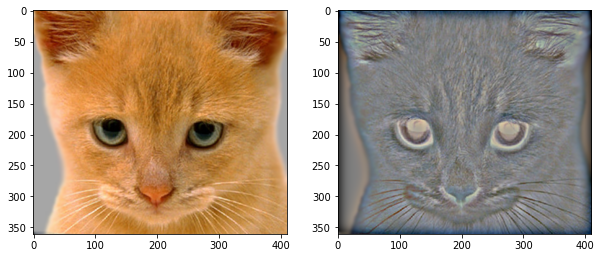

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.imshow(img_cat)
ax2.imshow(high_filtered_cat)

## **Part** **2.2**

In [ ]:
img_new_red = filter_red + high_filter_cat_red #adding red channel of dog and cat image 
img_new_green = filter_green + high_filter_cat_green #adding green channel of dog and cat image 
img_new_blue = filter_blue + high_filter_cat_blue #adding blue channel of dog and cat image 


In [ ]:
img_new = np.dstack((img_new_red,img_new_green,img_new_blue)) #merging
img_new = np.asarray(img_new).astype('int')
img_new.shape

(361, 410, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


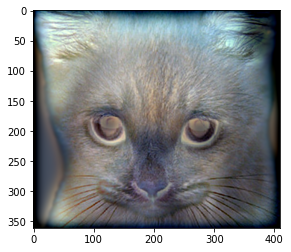

In [ ]:
plt.imshow(img_new)